In [2]:
import pandas as pd 
import numpy as np 
import pandas as pd
import requests
import json
import datetime as dt
import yfinance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from functions.datareader import YFinanceReader

In [3]:
# ticker_list = [v + market_suffix for s in stock_sectors.values() for v in s]
# ticker_list = ['GC=F']
# yfinance_meta = yf.Tickers(ticker_list)
# is_loaded = False

gold_price_raw = yf.download('GC=F', dt.date(2000, 1, 1), dt.date(2023, 8, 29), auto_adjust=True)
gold_price_raw.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-08-22,1894.599976,1896.800049,1892.800049,1896.400024,46
2023-08-23,1909.599976,1918.500000,1909.599976,1918.500000,547
2023-08-24,1920.000000,1920.800049,1918.199951,1918.199951,337
2023-08-25,1919.800049,1919.800049,1911.099976,1911.099976,195
2023-08-28,1915.500000,1921.500000,1915.500000,1917.900024,99


In [4]:
# pull data from FRED
fred_keys = {
    "DFF": "Federal Funds Effective Rate",
    "IRLTLT01USM156N": "US10Y Bond Yield",
    "USALOLITONOSTSAM": "US Leading Indicators OECD",
    "USACPIALLMINMEI": "CPI",
    "USACPICORMINMEI": "Core CPI",
    "CSCICP03USM665S": "Consumer Opinion Surveys Composite",
    "TOTDTEUSQ163N": "US Total D/E Ratio",
    "DDDI06USA156NWDB": "US Central Bank Assets to GDP",
    "DDDM03USA156NWDB": "Domestic Private Debt",
    "TRESEGUSM052N": "Total Reserves excluding Gold"
}

In [5]:
def read_fred(symbol:str, name:str = None):
    raw = pdr.get_data_fred(symbol)
    if name:
        raw.columns = [name]
    return raw

In [6]:
fred_data = [read_fred(k, v) for k, v in fred_keys.items()]
fred_df = pd.concat(fred_data, axis=1)

In [7]:
fred_df.head()

,Federal Funds Effective Rate,US10Y Bond Yield,US Leading Indicators OECD,CPI,Core CPI,Consumer Opinion Surveys Composite,US Total D/E Ratio,US Central Bank Assets to GDP,Domestic Private Debt,Total Reserves excluding Gold
DATE,,,,,,,,,,
2018-08-31,1.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,1.91,3.0,100.433691,106.506706,106.680179,101.509937,NaN,NaN,NaN,1.126876e+11
2018-09-02,1.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-03,1.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-04,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Alphavantage
with open('./keys/creds.json') as f:
    keys = json.load(f)
    key = keys['AlphaVantage']

In [9]:
url = 'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=10year&apikey=demo'
base_url = 'https://www.alphavantage.co/query'
params = {
    'apikey': key,
    'function': 'TREASURY_YIELD',
    'interval': 'daily',
    'maturity': '10year',
    'datatype': 'json'
}
res = requests.get(base_url, params=params)

In [16]:
df = pd.DataFrame(res.json()['data'])
# df['value'] = pd.to_numeric(df['value'])
df['value'] = df['value'].apply(lambda x: None if x == '.' else float(x))
df = df.rename(columns={'value': 'us_10y'}) \
        .set_index('date').sort_index()
df.head()

,us_10y
date,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


<AxesSubplot: xlabel='date'>

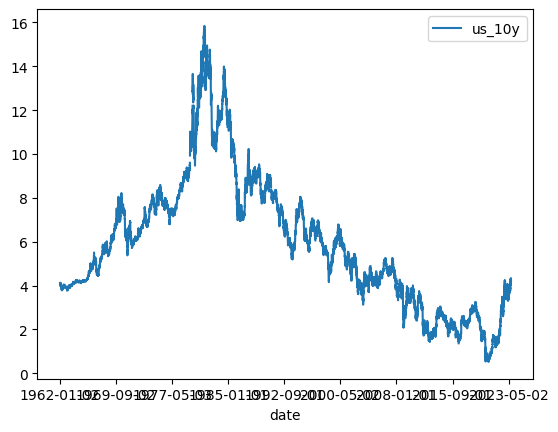

In [17]:
df.plot()

In [19]:
# save data
df.to_csv('./data/us/bond_yield/us_10y.csv')